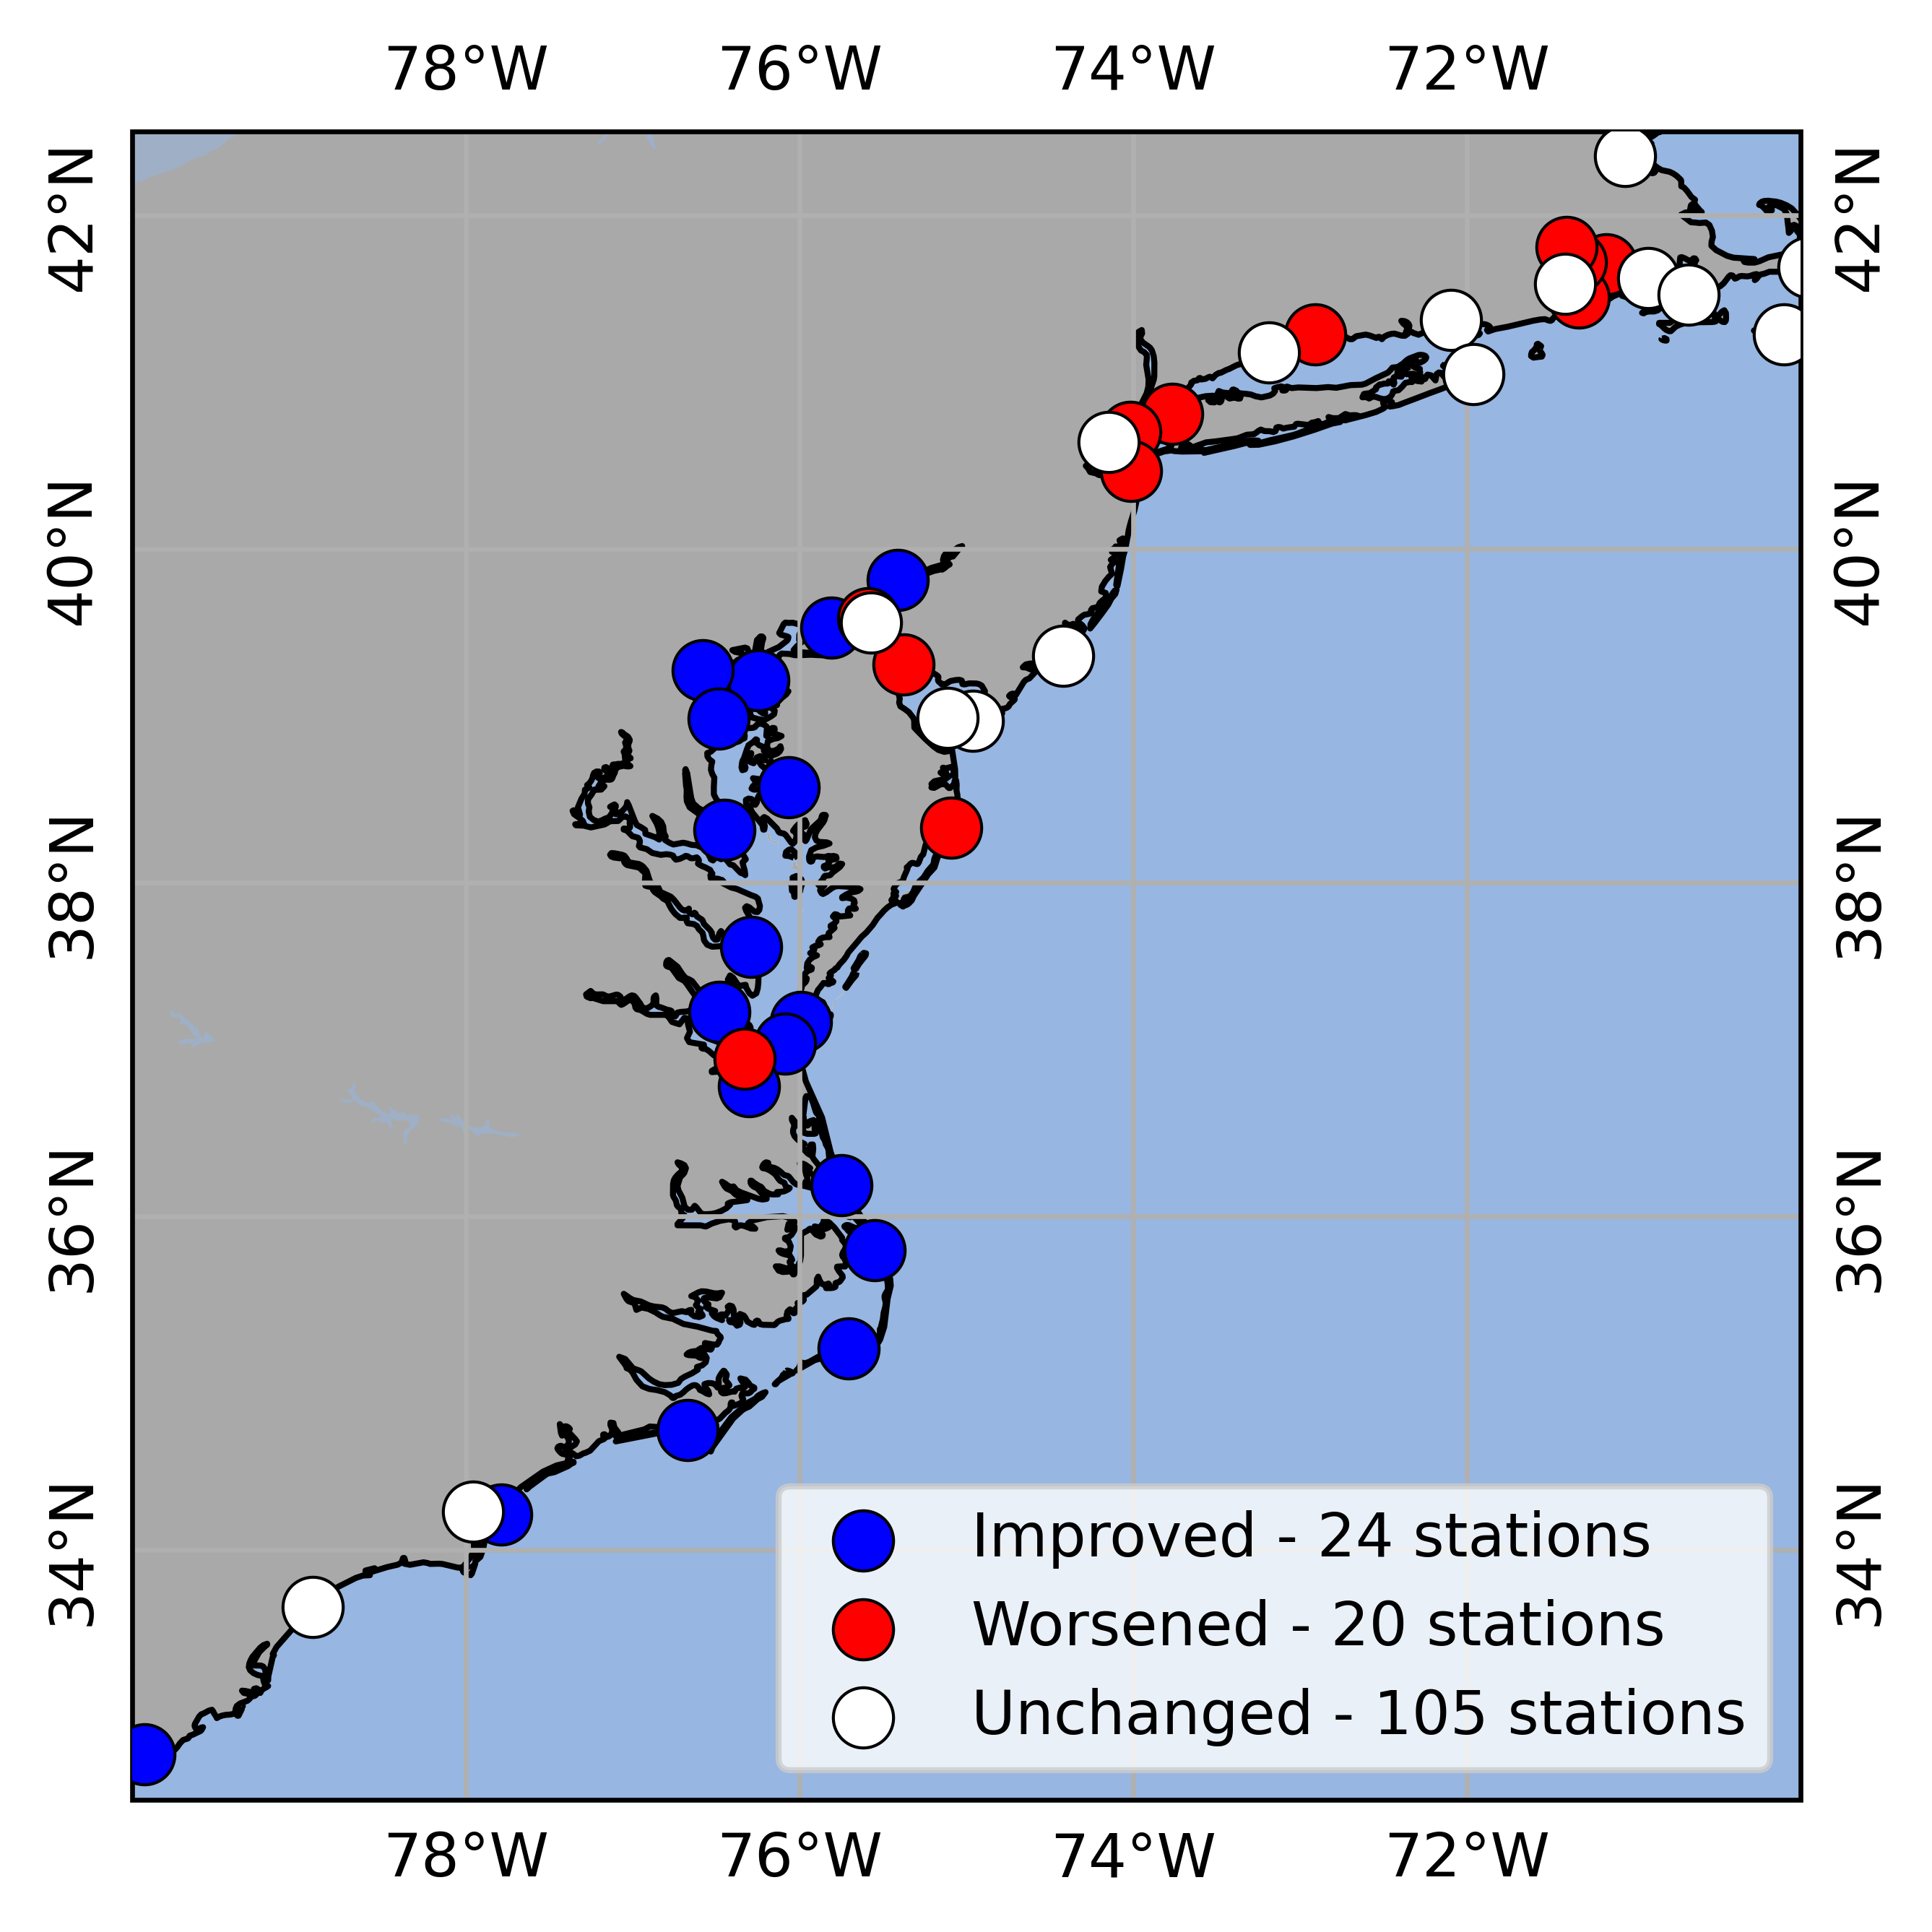

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

# Read the rmse details CSV file
mae_details = pd.read_csv('mae_swot_fast_mod.csv')

# Drop rows with NaN values in any of the relevant columns
mae_details = mae_details.dropna(subset=['Latitude', 'Longitude', 'mae-with', 'mae-without'])

# Extract the latitude, longitude, and RMSE values
lats = mae_details['Latitude']
lons = mae_details['Longitude']
mae_values = mae_details['mae-with'].round(2)
mae_without_values = mae_details['mae-without'].round(2)

# Calculate the difference
mae_difference = mae_without_values - mae_values

# Masks for improved, worsened, and unchanged
improved_mask = mae_difference > 0
worsened_mask = mae_difference < 0
unchanged_mask = mae_difference == 0

# Calculate the counts for each category
improved_count = improved_mask.sum()
worsened_count = worsened_mask.sum()
unchanged_count = unchanged_mask.sum()

# Set up the plot with Cartopy
fig = plt.figure(figsize=(10, 5), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the plot to the bounding box
ax.set_extent([-80, -70, 32.5, 42.5], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)  # Add coastline
# ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add country borders
ax.add_feature(cfeature.LAND, facecolor='darkgrey')  # Add land
ax.add_feature(cfeature.OCEAN)  # Add ocean
ax.add_feature(cfeature.LAKES, alpha=0.5)  # Add lakes
# ax.add_feature(cfeature.RIVERS)  # Add rivers

# Plot the scatter points with updated labels
ax.scatter(lons[improved_mask], lats[improved_mask], color='blue', edgecolor='black', linewidth=0.5, s=100, transform=ccrs.PlateCarree(), label=f'Improved - {improved_count} stations', zorder=3)
ax.scatter(lons[worsened_mask], lats[worsened_mask], color='red', edgecolor='black', linewidth=0.5, s=100, transform=ccrs.PlateCarree(), label=f'Worsened - {worsened_count} stations', zorder=3)
ax.scatter(lons[unchanged_mask], lats[unchanged_mask], color='white', edgecolor='black', linewidth=0.5, s=100, transform=ccrs.PlateCarree(), label=f'Unchanged - {unchanged_count} stations', zorder=3)

# Add a legend
plt.legend(loc='lower right', fontsize='medium')

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True)
gl.xlocator = mticker.MultipleLocator(2)  # Set longitude gridline interval
gl.ylocator = mticker.MultipleLocator(2)  # Set latitude gridline interval
gl.ylabel_style = {'rotation': 90}

# Display the plot
plt.show()